In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import fetch_openml

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORTING DATA

In [ ]:
# Load the dataset
csv_loc = "/content/drive/MyDrive/diabetes.csv"
data = pd.read_csv(csv_loc)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Checking for missing values
missing_values = data.isnull().sum().sum()
if missing_values == 0:
    print("\nNo missing values found in the dataset.")
else:
    print(f"\nMissing values found in the dataset: {missing_values}")
    print("Consider imputation for handling missing data.")


No missing values found in the dataset.


In [ ]:
# Check data types
data_types = data.dtypes
print("\nData Types of Each Column:")
print(data_types)


Data Types of Each Column:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
# Summary statistics for all columns
summary_stats = data.describe(include='all')
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


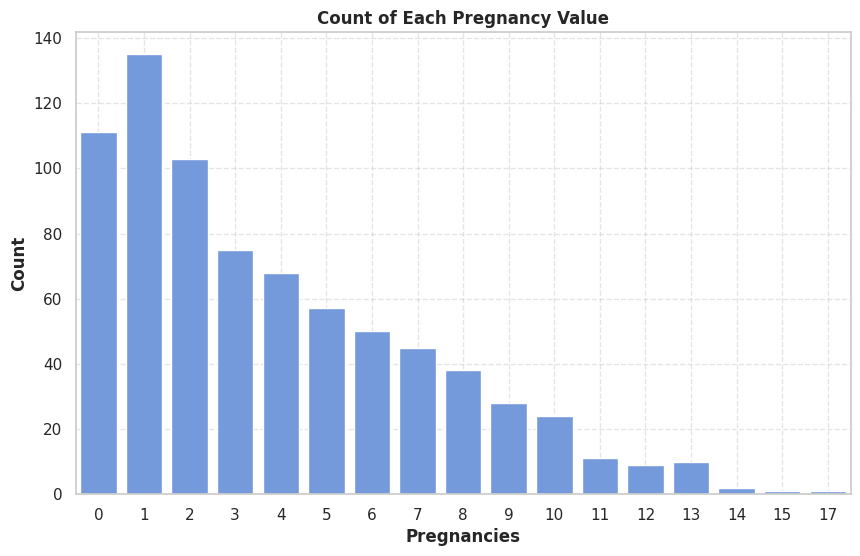

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot barplot of value counts
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Pregnancies', color='cornflowerblue')

# Labels and title
plt.title('Count of Each Pregnancy Value', fontweight='bold')
plt.xlabel('Pregnancies', fontweight='semibold')
plt.ylabel('Count', fontweight='semibold')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


In [ ]:
# Normalize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)



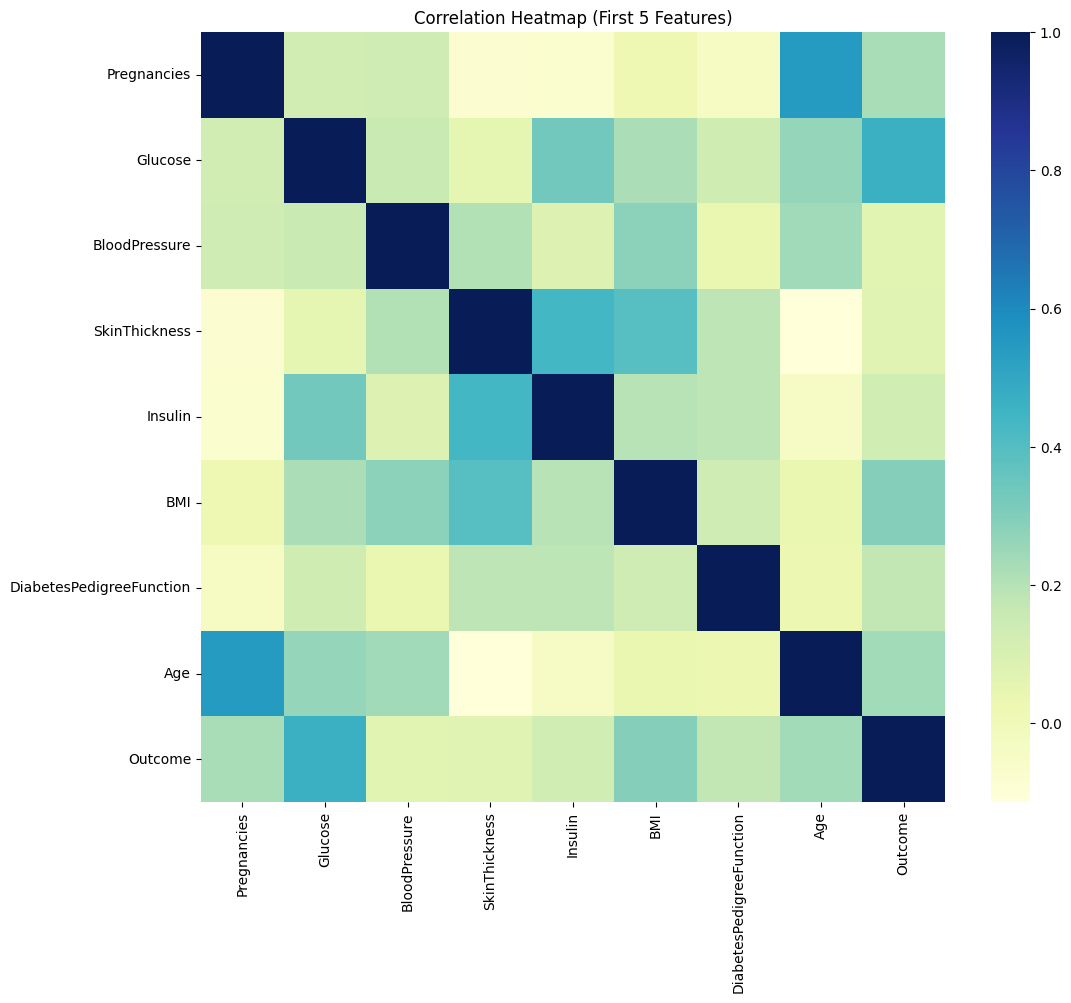

In [ ]:
# Compute correlation matrix for 5 features
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='YlGnBu', cbar=True)
plt.title("Correlation Heatmap (First 5 Features)")
plt.show()


In [ ]:
# Count of each outcome
outcome_counts = data['Outcome'].value_counts()
print(outcome_counts)

Outcome
0    500
1    268
Name: count, dtype: int64


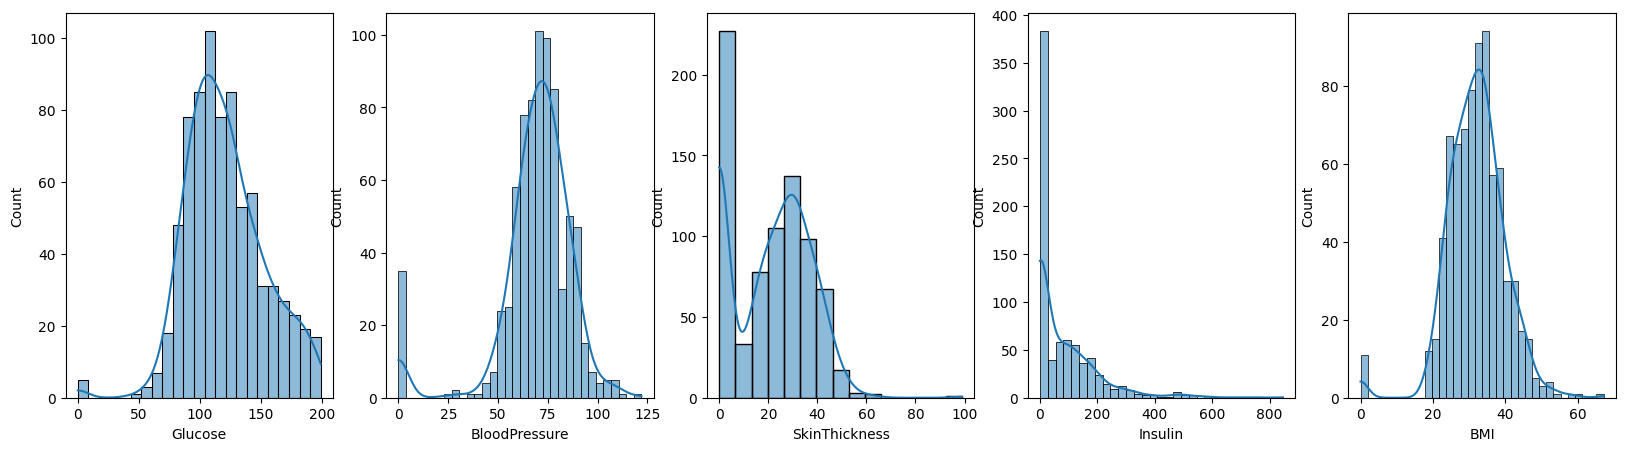

In [ ]:
# See data distribution for glucose, blood_pressure, skin_thickness, insulin, and bmi
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
fig = plt.figure(figsize=(20, 5))
for i in range(len(cols)):
    plt.subplot(1, 5, i+1)
    sns.histplot(data[cols[i]], kde=True)

In [ ]:
from sklearn.impute import KNNImputer
import numpy as np

# First, replace 0s with NaN in specific columns
cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero_as_missing:
    data[col] = data[col].replace(0, np.nan)

# Now apply KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can change neighbors like 3, 5, 7 based on your dataset
data_imputed = imputer.fit_transform(data)

# Convert back to a dataframe
data = pd.DataFrame(data_imputed, columns=data.columns)


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.598177,72.371354,29.114583,153.180208,32.427344,0.471876,33.240885,0.348958
std,3.369578,30.496543,12.206417,9.424100,98.385308,6.886588,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,87.900000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,133.700000,32.090000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,190.150000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


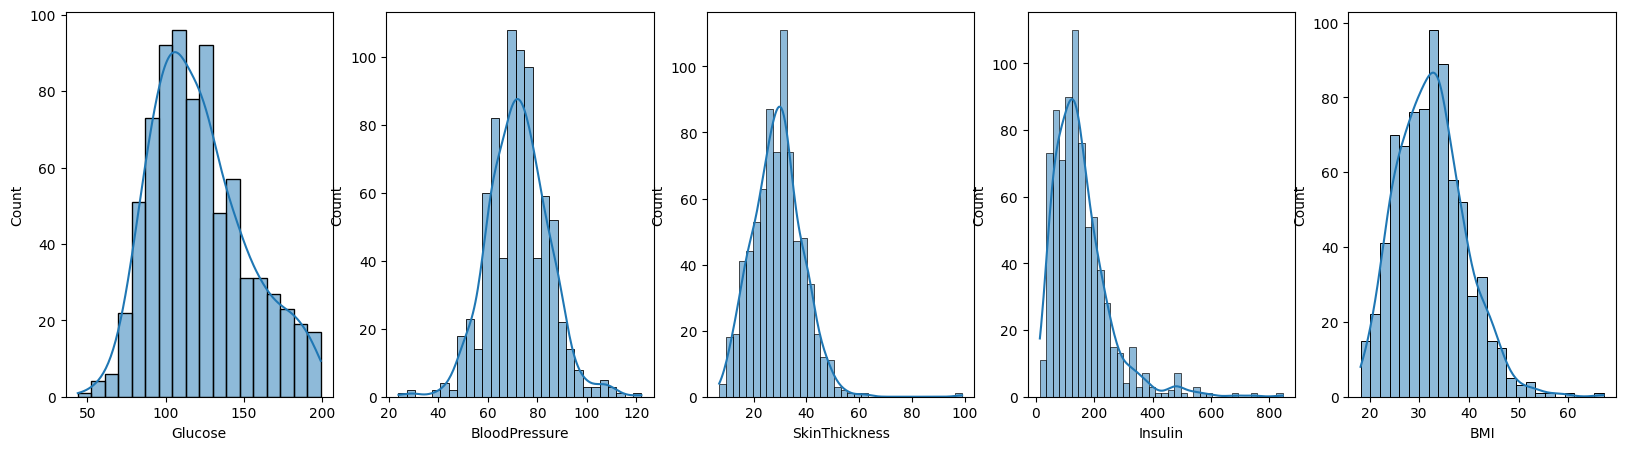

In [ ]:
# See data distribution for glucose, blood_pressure, skin_thickness, insulin, and bmi
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
fig = plt.figure(figsize=(20, 5))
for i in range(len(cols)):
    plt.subplot(1, 5, i+1)
    sns.histplot(data[cols[i]], kde=True)

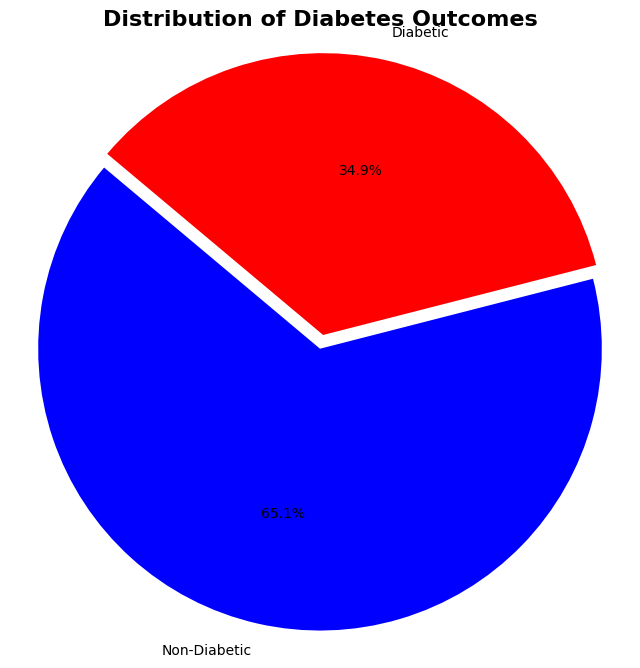

In [ ]:
import matplotlib.pyplot as plt

# Count values for the Outcome column
outcome_counts = data['Outcome'].value_counts()

# Labels and values
labels = ['Non-Diabetic', 'Diabetic']
sizes = outcome_counts.values
colors = ['blue', 'red']  # Non-Diabetic = green, Diabetic = orange

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=(0, 0.05))  # Pop out diabetic slice slightly

plt.title('Distribution of Diabetes Outcomes', fontsize=16, fontweight='bold')
plt.axis('equal')  # Keeps the pie circular
plt.show()



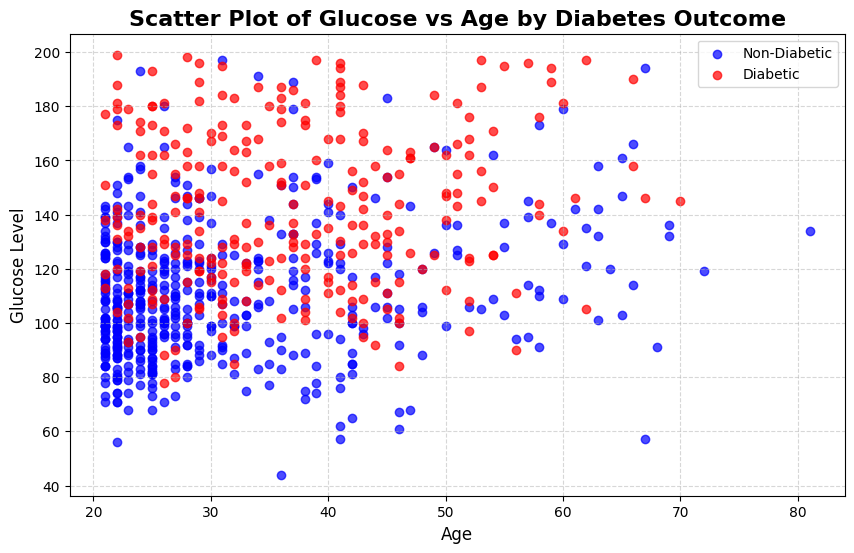

In [ ]:
import matplotlib.pyplot as plt

# Separate the two classes
diabetic = data[data['Outcome'] == 1]
non_diabetic = data[data['Outcome'] == 0]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot non-diabetic (blue)
plt.scatter(non_diabetic['Age'], non_diabetic['Glucose'],
            color='blue', alpha=0.7, label='Non-Diabetic')

# Plot diabetic (red)
plt.scatter(diabetic['Age'], diabetic['Glucose'],
            color='red', alpha=0.7, label='Diabetic')

# Add labels, title, legend
plt.title('Scatter Plot of Glucose vs Age by Diabetes Outcome', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Glucose Level', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()






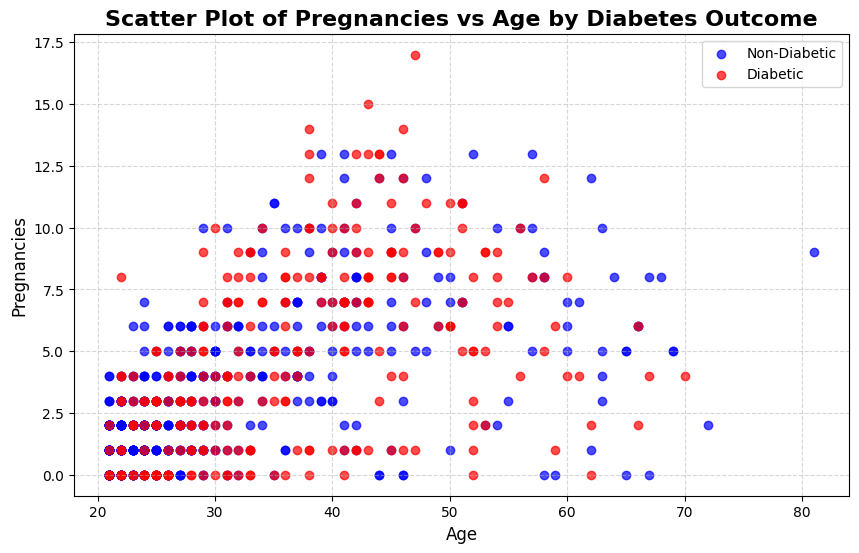

In [ ]:
import matplotlib.pyplot as plt

# Separate the two classes
diabetic = data[data['Outcome'] == 1]
non_diabetic = data[data['Outcome'] == 0]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot non-diabetic (blue)
plt.scatter(non_diabetic['Age'], non_diabetic['Pregnancies'],
            color='blue', alpha=0.7, label='Non-Diabetic')

# Plot diabetic (red)
plt.scatter(diabetic['Age'], diabetic['Pregnancies'],
            color='red', alpha=0.7, label='Diabetic')

# Add labels, title, legend
plt.title('Scatter Plot of Pregnancies vs Age by Diabetes Outcome', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Pregnancies', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()



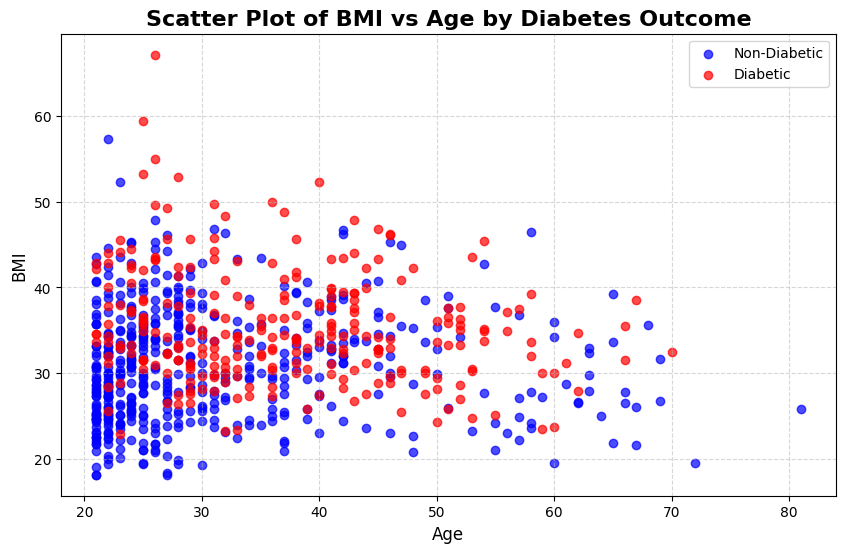

In [ ]:
import matplotlib.pyplot as plt

# Separate the two classes
diabetic = data[data['Outcome'] == 1]
non_diabetic = data[data['Outcome'] == 0]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot non-diabetic (blue)
plt.scatter(non_diabetic['Age'], non_diabetic['BMI'],
            color='blue', alpha=0.7, label='Non-Diabetic')

# Plot diabetic (red)
plt.scatter(diabetic['Age'], diabetic['BMI'],
            color='red', alpha=0.7, label='Diabetic')

# Add labels, title, legend
plt.title('Scatter Plot of BMI vs Age by Diabetes Outcome', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

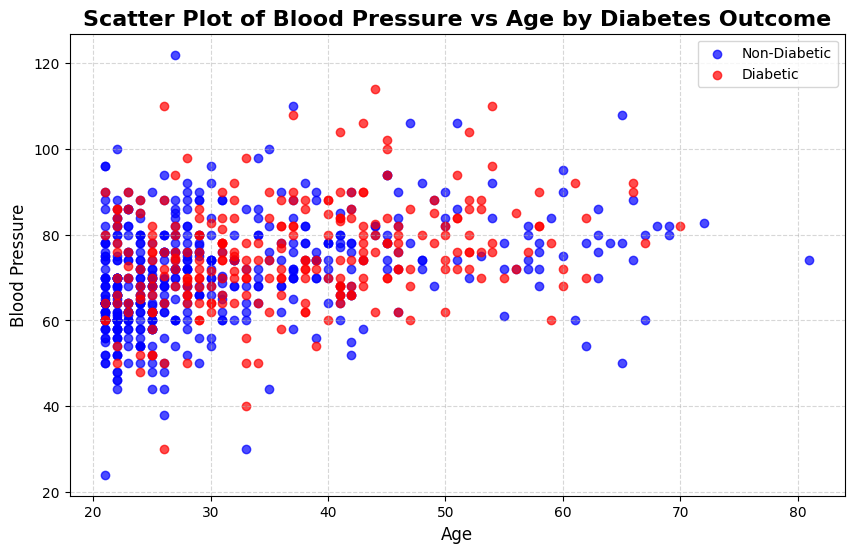

In [ ]:
import matplotlib.pyplot as plt

# Separate the two classes
diabetic = data[data['Outcome'] == 1]
non_diabetic = data[data['Outcome'] == 0]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot non-diabetic (blue)
plt.scatter(non_diabetic['Age'], non_diabetic['BloodPressure'],
            color='blue', alpha=0.7, label='Non-Diabetic')

# Plot diabetic (red)
plt.scatter(diabetic['Age'], diabetic['BloodPressure'],
            color='red', alpha=0.7, label='Diabetic')

# Add labels, title, legend
plt.title('Scatter Plot of Blood Pressure vs Age by Diabetes Outcome', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Blood Pressure', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

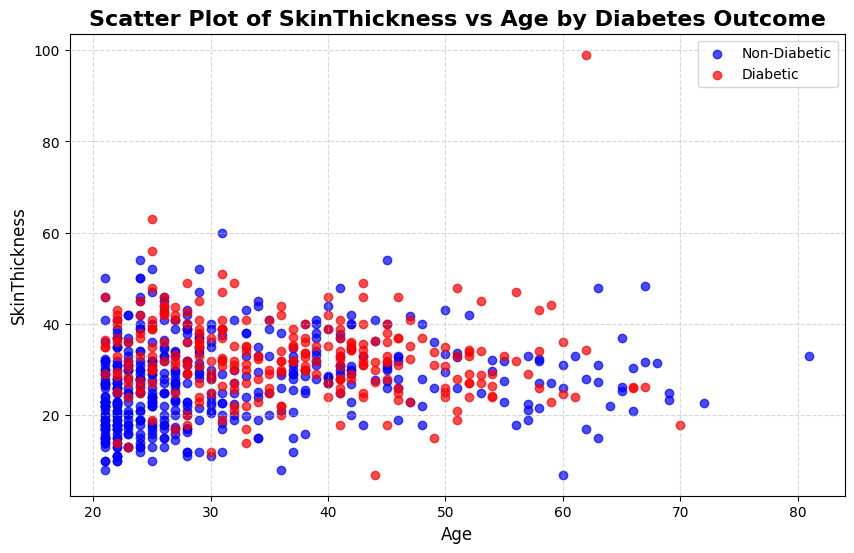

In [ ]:

import matplotlib.pyplot as plt

# Separate the two classes
diabetic = data[data['Outcome'] == 1]
non_diabetic = data[data['Outcome'] == 0]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot non-diabetic (blue)
plt.scatter(non_diabetic['Age'], non_diabetic['SkinThickness'],
            color='blue', alpha=0.7, label='Non-Diabetic')

# Plot diabetic (red)
plt.scatter(diabetic['Age'], diabetic['SkinThickness'],
            color='red', alpha=0.7, label='Diabetic')

# Add labels, title, legend
plt.title('Scatter Plot of SkinThickness vs Age by Diabetes Outcome', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('SkinThickness', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

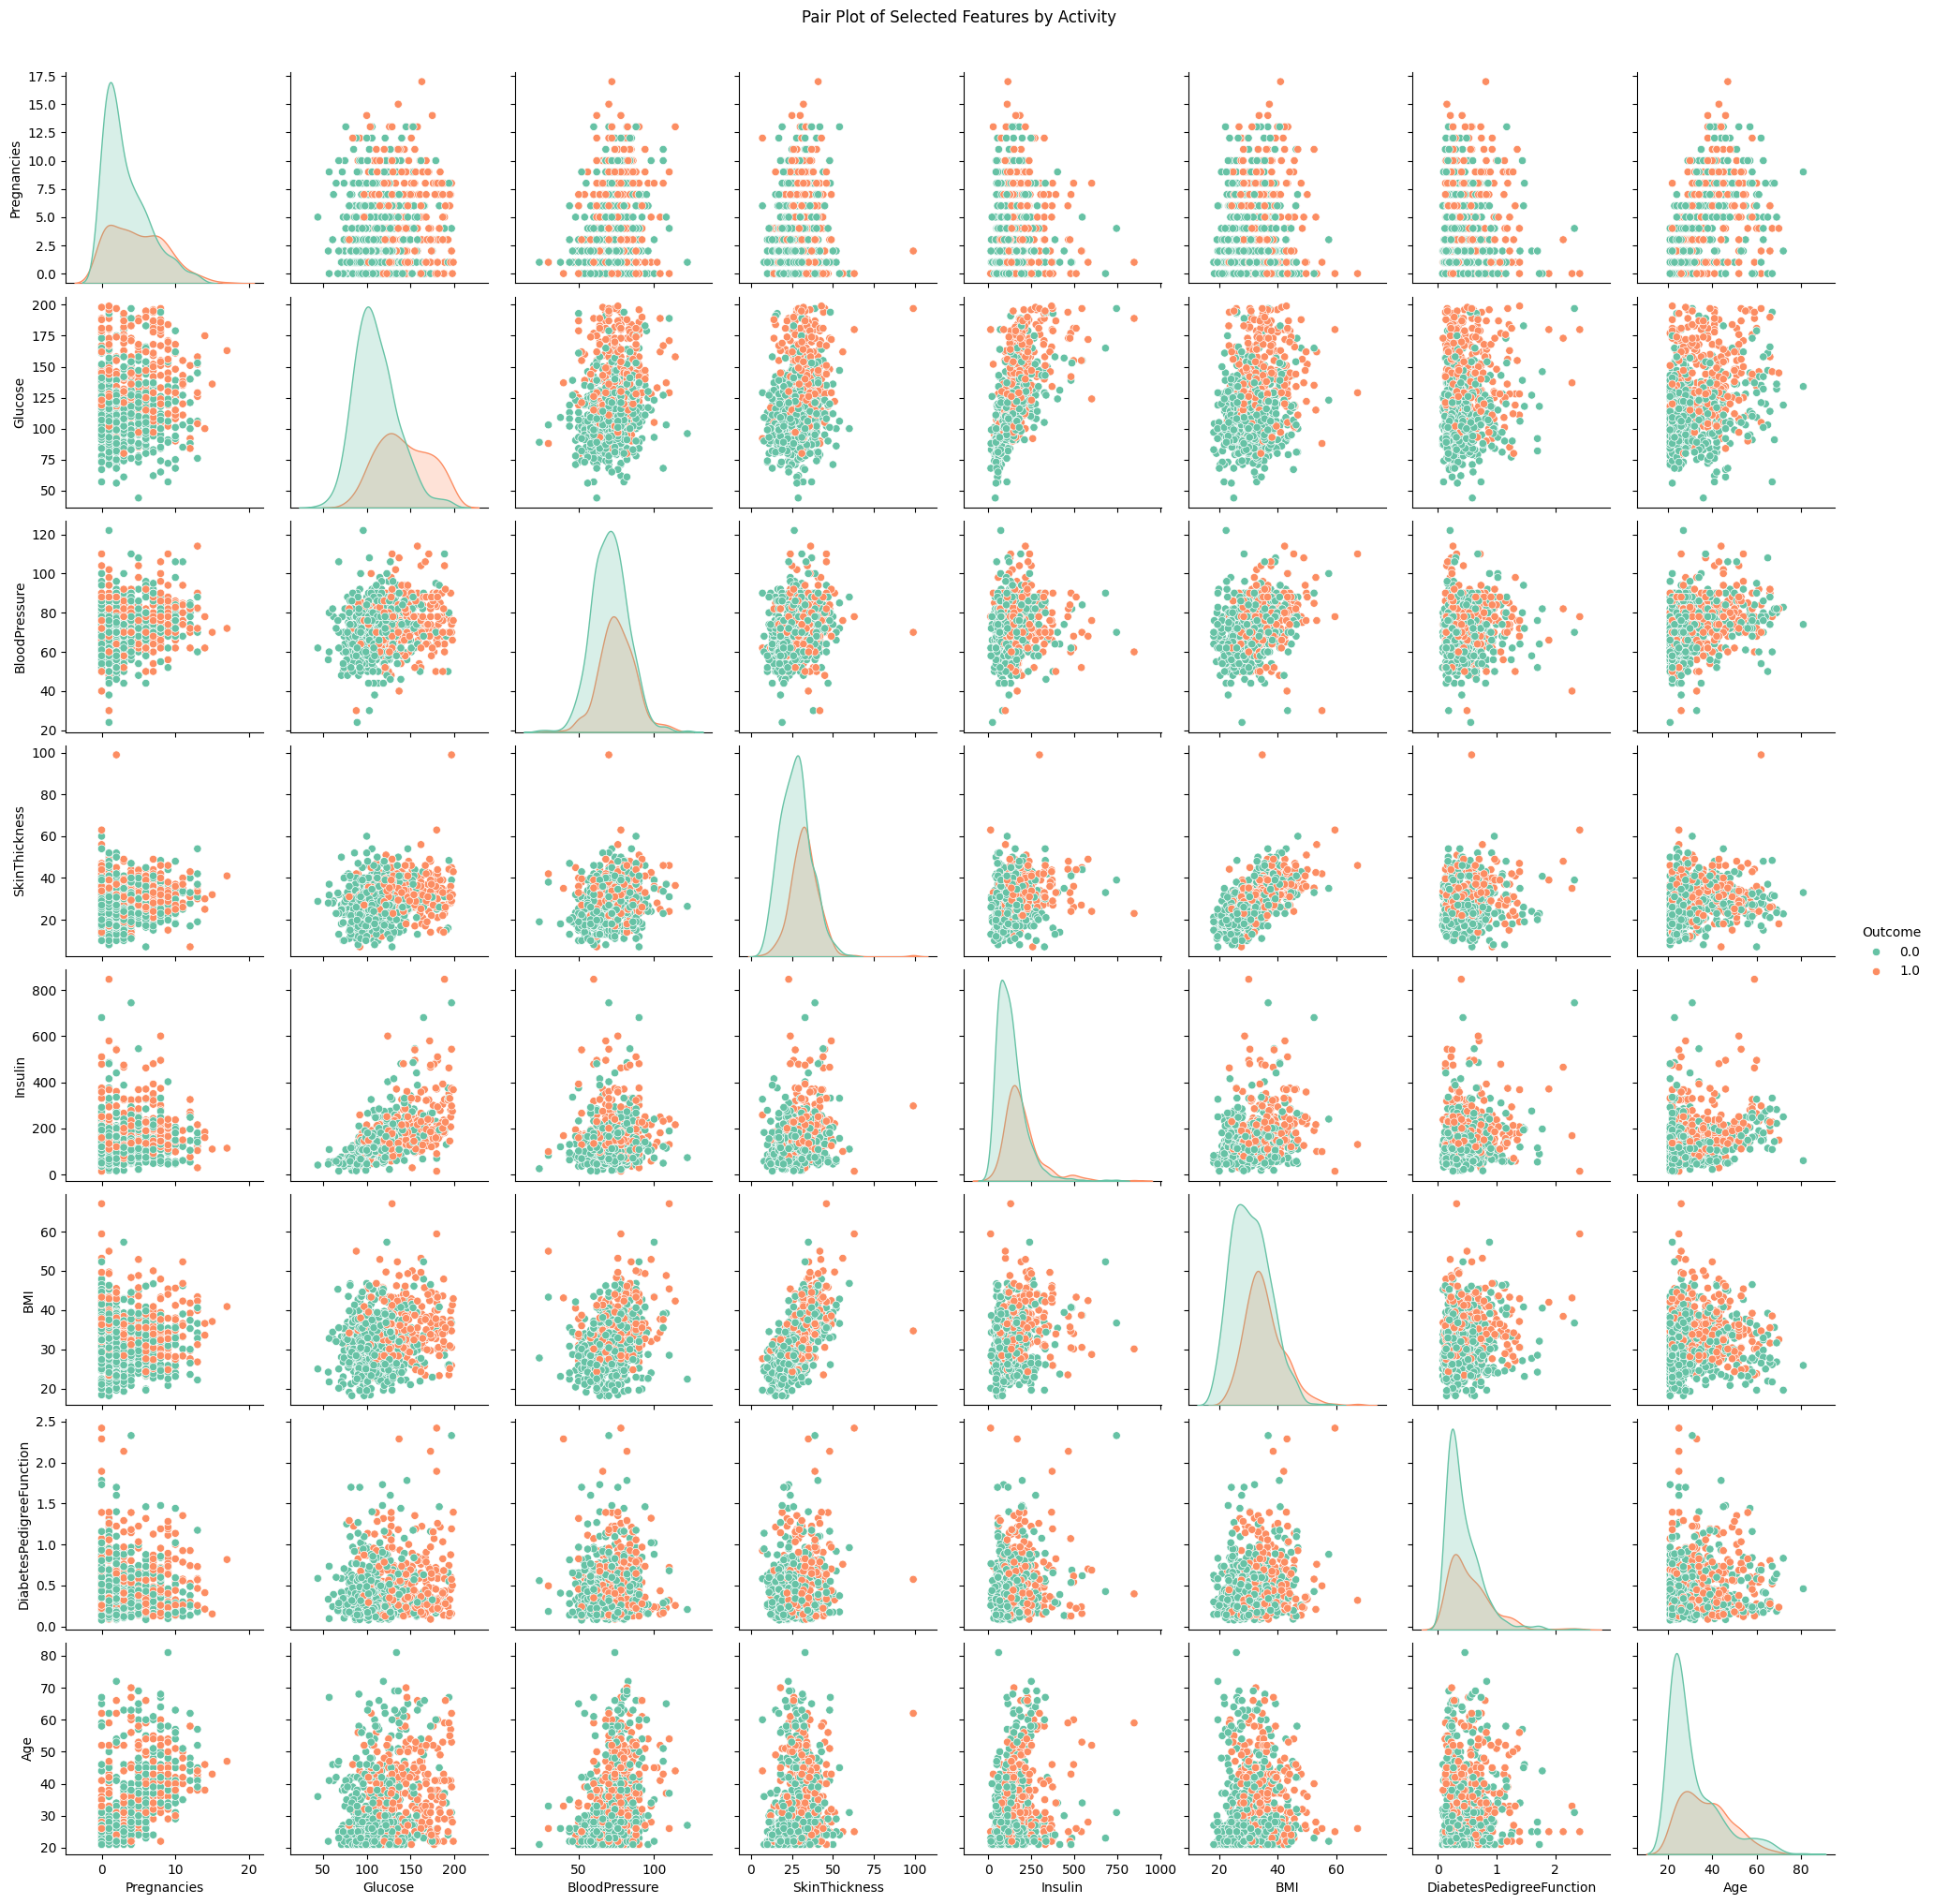

In [ ]:
# Pair plot
sns.pairplot(data, hue='Outcome', palette='Set2')
plt.suptitle("Pair Plot of Selected Features by Activity", y=1.02)
plt.show()

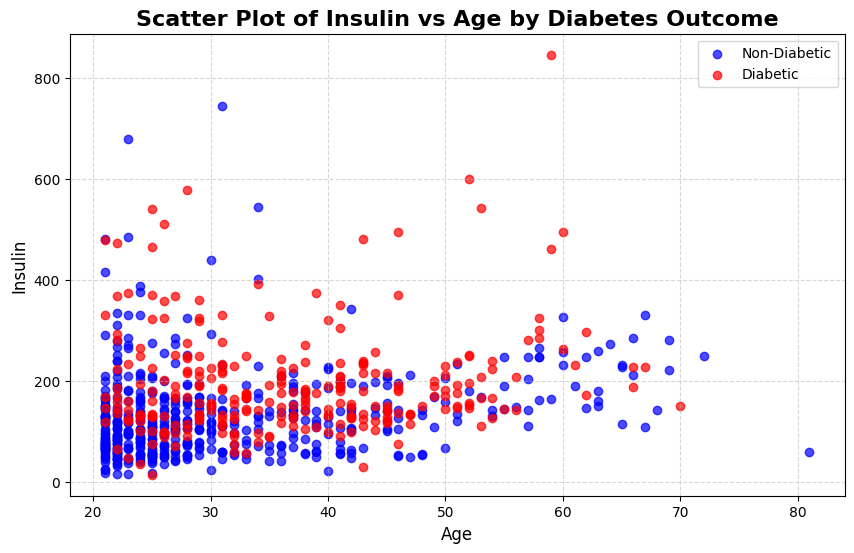

In [ ]:

import matplotlib.pyplot as plt

# Separate the two classes
diabetic = data[data['Outcome'] == 1]
non_diabetic = data[data['Outcome'] == 0]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot non-diabetic (blue)
plt.scatter(non_diabetic['Age'], non_diabetic['Insulin'],
            color='blue', alpha=0.7, label='Non-Diabetic')

# Plot diabetic (red)
plt.scatter(diabetic['Age'], diabetic['Insulin'],
            color='red', alpha=0.7, label='Diabetic')

# Add labels, title, legend
plt.title('Scatter Plot of Insulin vs Age by Diabetes Outcome', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Insulin', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

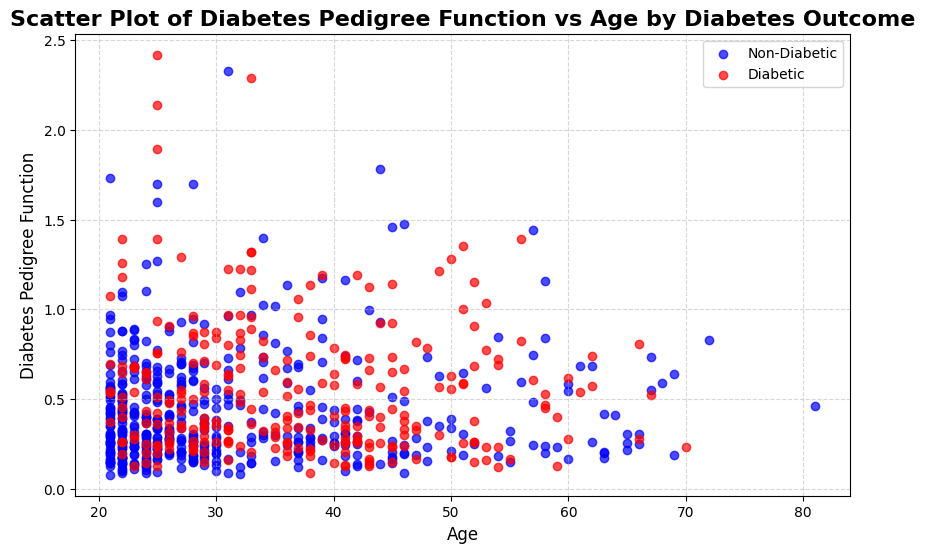

In [ ]:

import matplotlib.pyplot as plt

# Separate the two classes
diabetic = data[data['Outcome'] == 1]
non_diabetic = data[data['Outcome'] == 0]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot non-diabetic (blue)
plt.scatter(non_diabetic['Age'], non_diabetic['DiabetesPedigreeFunction'],
            color='blue', alpha=0.7, label='Non-Diabetic')

# Plot diabetic (red)
plt.scatter(diabetic['Age'], diabetic['DiabetesPedigreeFunction'],
            color='red', alpha=0.7, label='Diabetic')

# Add labels, title, legend
plt.title('Scatter Plot of Diabetes Pedigree Function vs Age by Diabetes Outcome', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Diabetes Pedigree Function', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

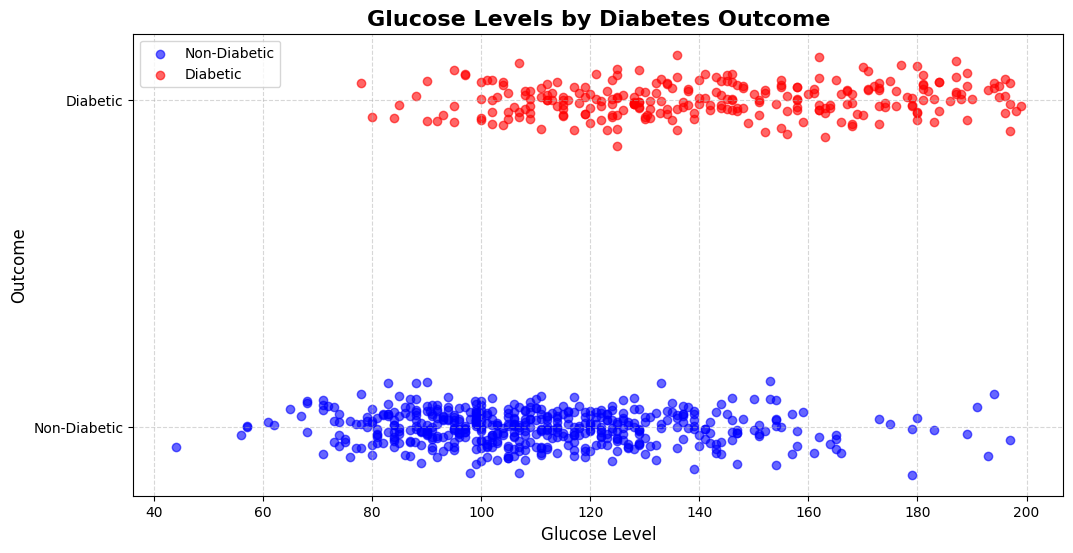

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure
plt.figure(figsize=(12, 6))

# Add jitter to y-axis just for visual separation
y_non_diabetic = np.random.normal(0, 0.05, size=(data[data['Outcome'] == 0].shape[0]))
y_diabetic = np.random.normal(1, 0.05, size=(data[data['Outcome'] == 1].shape[0]))

# Plot non-diabetic patients
plt.scatter(data[data['Outcome'] == 0]['Glucose'],
            y_non_diabetic,
            color='blue',
            label='Non-Diabetic',
            alpha=0.6)

# Plot diabetic patients
plt.scatter(data[data['Outcome'] == 1]['Glucose'],
            y_diabetic,
            color='red',
            label='Diabetic',
            alpha=0.6)

# Set labels and title
plt.title('Glucose Levels by Diabetes Outcome', fontsize=16, fontweight='bold')
plt.xlabel('Glucose Level', fontsize=12)
plt.yticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.ylabel('Outcome', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


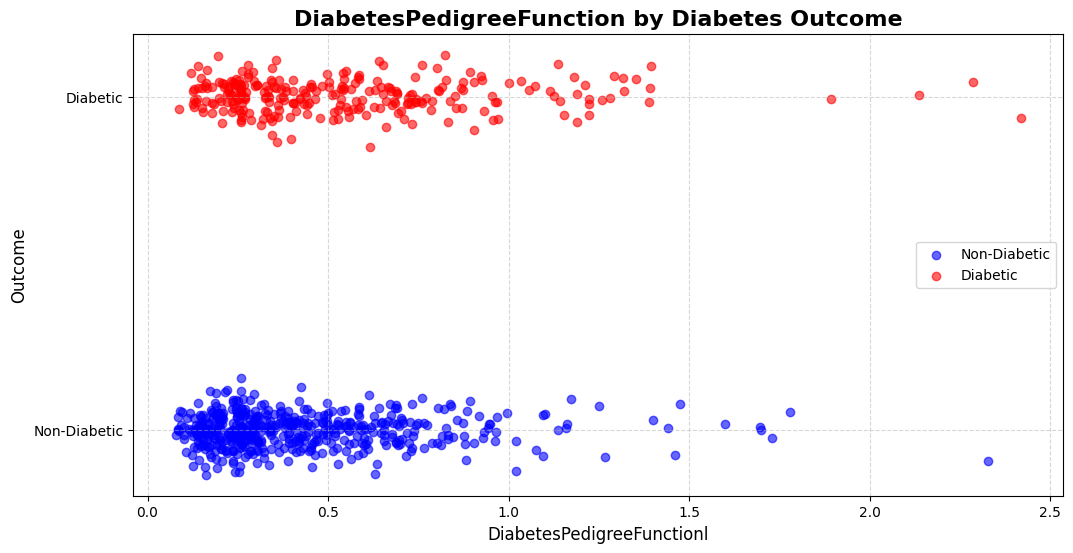

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure
plt.figure(figsize=(12, 6))

# Add jitter to y-axis just for visual separation
y_non_diabetic = np.random.normal(0, 0.05, size=(data[data['Outcome'] == 0].shape[0]))
y_diabetic = np.random.normal(1, 0.05, size=(data[data['Outcome'] == 1].shape[0]))

# Plot non-diabetic patients
plt.scatter(data[data['Outcome'] == 0]['DiabetesPedigreeFunction'],
            y_non_diabetic,
            color='blue',
            label='Non-Diabetic',
            alpha=0.6)

# Plot diabetic patients
plt.scatter(data[data['Outcome'] == 1]['DiabetesPedigreeFunction'],
            y_diabetic,
            color='red',
            label='Diabetic',
            alpha=0.6)

# Set labels and title
plt.title('DiabetesPedigreeFunction by Diabetes Outcome', fontsize=16, fontweight='bold')
plt.xlabel('DiabetesPedigreeFunctionl', fontsize=12)
plt.yticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.ylabel('Outcome', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train)

print(x_train.shape)

In [ ]:
# Replace zero values with NaN in relevant columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, pd.NA)

In [ ]:
# Fill NaN values with median of the respective columns
data.fillna(data.median(), inplace=True)

# Feature Scaling
scaler = StandardScaler()
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(
    data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
)




<ipython-input-33-1f41c56dbb43>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(data.median(), inplace=True)


In [ ]:
# Save the cleaned dataset
data.to_csv("/content/drive/MyDrive/cleaned_diabetes.csv", index=False)

In [ ]:
# Split the data into training and testing sets
X = data.drop(columns=['Outcome'])
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


NameError: name 'data' is not defined

In [ ]:
# Build a Deep Neural Network (DNN) model
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
dnn_loss, dnn_accuracy = dnn_model.evaluate(X_test, y_test)
print(f"Deep Neural Network Model Accuracy: {dnn_accuracy:.2f}")



NameError: name 'Sequential' is not defined

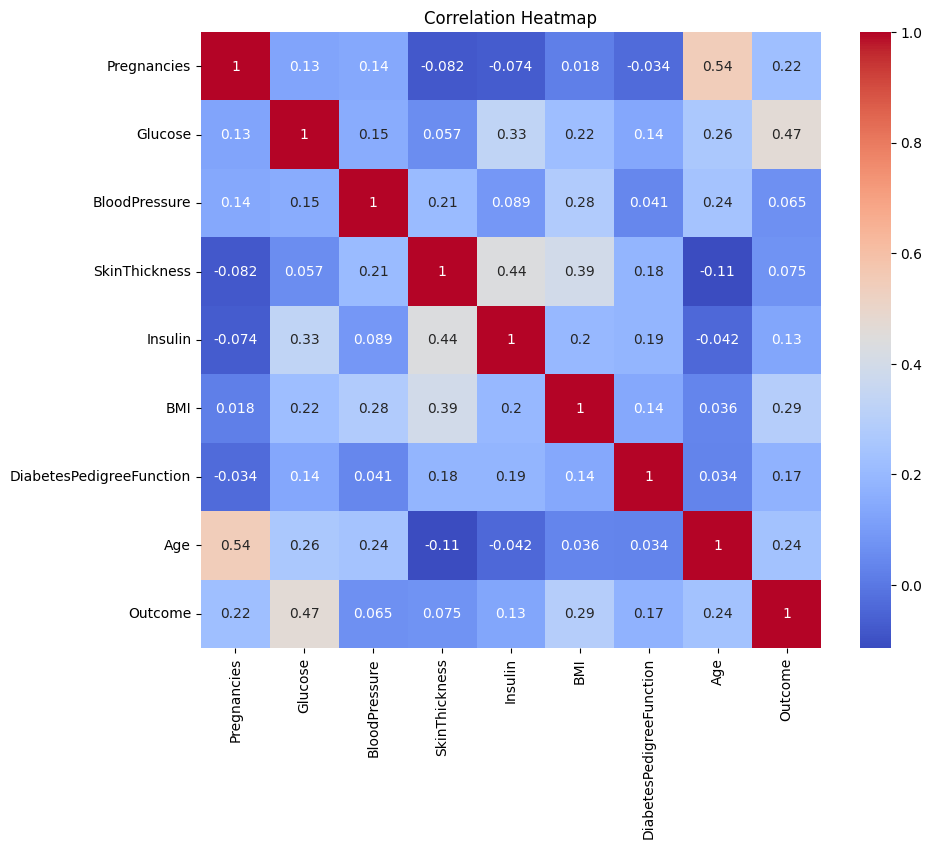

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data.isnull().values.any()

np.False_

In [ ]:
true_count= len(data.loc[data['Outcome']==True])
False_count= len(data.loc[data['Outcome']==False])
(true_count,False_count)

(268, 500)

In [ ]:
from sklearn.model_selection import train_test_split
X = data[['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = data['Outcome']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [ ]:
n_estimators = 10
base_models = []

In [ ]:
for i in range(n_estimators):
    rf = RandomForestClassifier(n_estimators=200)
    rf.fit(X_train, Y_train)
    base_models.append(rf)

In [ ]:
predictions = [model.predict(X_test) for model in base_models]

In [ ]:
ensemble_predictions = np.round(np.mean(predictions, axis=0))

In [ ]:
ensemble_accuracy = accuracy_score(Y_test, ensemble_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy}")

Ensemble Accuracy: 0.7748917748917749


In [ ]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(Y_test, ensemble_predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[139  18]
 [ 34  40]]


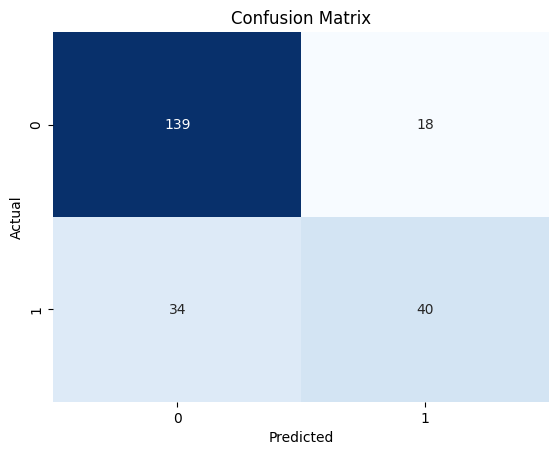

In [ ]:
cm = confusion_matrix(Y_test, ensemble_predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Get input from the user
user_input = {
    'Pregnancies': float(input('Enter number of pregnancies: ')),
    'Glucose': float(input('Enter Glucose level: ')),
    'BloodPressure': float(input('Enter Blood Pressure: ')),
    'SkinThickness': float(input('Enter Skin Thickness: ')),
    'Insulin': float(input('Enter Insulin level: ')),
    'BMI': float(input('Enter BMI: ')),
    'DiabetesPedigreeFunction': float(input('Enter Diabetes Pedigree Function: ')),
    'Age': float(input('Enter Age: '))
}

# Convert the user input into a DataFrame
user_df = pd.DataFrame([user_input])

# Make a prediction using the trained model
user_prediction = rf.predict(user_df)

# Interpret the prediction
if user_prediction[0] == 0:
    result = "No diabetes"
else:
    result = "Diabetes"

print(f"The model predicts: {result}")

Enter number of pregnancies: 0
Enter Glucose level: 126
Enter Blood Pressure: 90
Enter Skin Thickness: 8
Enter Insulin level: 8
Enter BMI: 28
Enter Diabetes Pedigree Function: 0
Enter Age: 35
The model predicts: Diabetes


In [ ]:
# Get input from the user
user_input = {
    'Glucose': float(input('Enter Glucose level: ')),
    'BloodPressure': float(input('Enter Blood Pressure: ')),
    'SkinThickness': float(input('Enter Skin Thickness: ')),
    'Insulin': float(input('Enter Insulin level: ')),
    'BMI': float(input('Enter BMI: ')),
    'DiabetesPedigreeFunction': float(input('Enter Diabetes Pedigree Function: ')),
    'Age': float(input('Enter Age: '))
}

# Convert the user input into a DataFrame
user_df = pd.DataFrame([user_input])

# Make a prediction using the trained model
user_prediction = rf.predict(user_df)

# Interpret the prediction
if user_prediction[0] == 0:
    result = "No diabetes"
else:
    result = "Diabetes"

print(f"The model predicts: {result}")

Enter Glucose level: 100
Enter Blood Pressure: 95
Enter Skin Thickness: 8
Enter Insulin level: 2
Enter BMI: 35
Enter Diabetes Pedigree Function: 2.42
Enter Age: 50
The model predicts: No diabetes


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
28/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5230 - loss: 0.6943 

39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5461 - loss: 0.6807 - val_accuracy: 0.7143 - val_loss: 0.5742
Epoch 2/50
30/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7105 - loss: 0.5446 

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7084 - loss: 0.5424 - val_accuracy: 0.7662 - val_loss: 0.5062
Epoch 3/50
31/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7623 - loss: 0.4832 

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7609 - loss: 0.4814 - val_accuracy: 0.7727 - val_loss: 0.4834
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7875 - loss: 0.4542 - val_accuracy: 0.7403 - val_loss: 0.4845
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7399 - loss: 0.4595 - val_accuracy: 0.7532 - val_loss: 0.4923
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7460 - loss: 0.4767 - val_accuracy: 0.7532 - val_loss: 0.4898
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7676 - loss: 0.4536 - val_accuracy: 0.7403 - val_loss: 0.4974
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8086 - loss: 0.4156 - val_accuracy: 0.7468 - val_loss: 0.4935
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7597 - loss: 0.4915 

 Test Accuracy: 77.27%


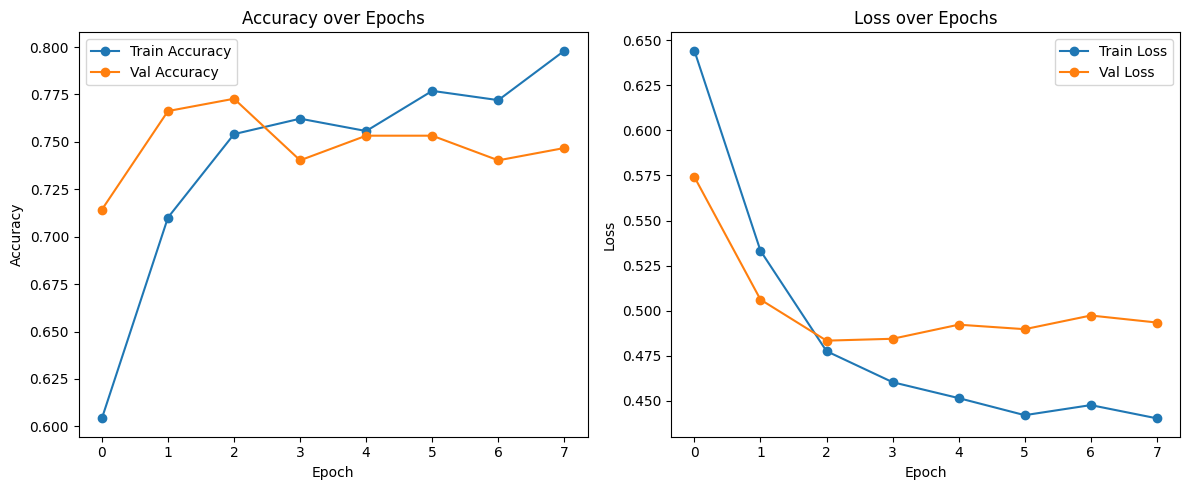

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Probability of diabetes: 1.0
Prediction: Diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

# OPTIONAL: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks: early stopping and saving best model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_dnn_model.h5', monitor='val_loss', save_best_only=True)
]

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

# Evaluate
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\n Test Accuracy: {accuracy:.2%}")

# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# Load best model later if needed
# from tensorflow.keras.models import load_model
# best_model = load_model('best_dnn_model.h5')

# Predict on a new sample (example)
sample_input = np.array([[2, 130, 80, 25, 90, 30.5, 0.45, 45]])  # Shape (1, 8)
sample_scaled = scaler.transform(sample_input)
prediction = model.predict(sample_scaled)
print("Probability of diabetes:", prediction[0][0])
print("Prediction:", "Diabetes" if prediction[0][0] > 0.5 else "No diabetes")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Probability of diabetes: 1.0
Prediction: Diabetes


In [ ]:
# Load best model later if needed
# from tensorflow.keras.models import load_model
# best_model = load_model('best_dnn_model.h5')

# Predict on a new sample (example)
sample_input = np.array([[0, 126, 90, 8, 8, 28, 0, 35]])  # Shape (1, 8)
sample_scaled = scaler.transform(sample_input)
prediction = model.predict(sample_scaled)
print("Probability of diabetes:", prediction[0][0])
print("Prediction:", "Diabetes" if prediction[0][0] > 0.5 else "No diabetes")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Probability of diabetes: 1.0
Prediction: Diabetes


In [ ]:
# Get input from the user
user_input = {
    'Pregnancies': float(input('Enter number of pregnancies: ')),
    'Glucose': float(input('Enter Glucose level: ')),
    'BloodPressure': float(input('Enter Blood Pressure: ')),
    'SkinThickness': float(input('Enter Skin Thickness: ')),
    'Insulin': float(input('Enter Insulin level: ')),
    'BMI': float(input('Enter BMI: ')),
    'DiabetesPedigreeFunction': float(input('Enter Diabetes Pedigree Function: ')),
    'Age': float(input('Enter Age: '))
}

# Convert the user input into a DataFrame
user_df = pd.DataFrame([user_input])

# Make a prediction using the trained model
user_prediction = rf.predict(user_df)

# Interpret the prediction
if user_prediction[0] == 0:
    result = "No diabetes"
else:
    result = "Diabetes"

print(f"The model predicts: {result}")

Enter number of pregnancies: 2
Enter Glucose level: 126
Enter Blood Pressure: 90
Enter Skin Thickness: 8
Enter Insulin level: 8
Enter BMI: 28
Enter Diabetes Pedigree Function: 0
Enter Age: 35


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Pregnancies
